In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('Iris.csv')

In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le_Species = LabelEncoder()

In [17]:
df['Species'] = le_Species.fit_transform(df['Species'])

In [20]:
target = df['Species']
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Species'],axis = 1),target, test_size = 0.2)

In [31]:
len(X_train)

120

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
model.score(X_test, y_test)

1.0

In [41]:
y_predicted = model.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_predicted)
cn

array([[13,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

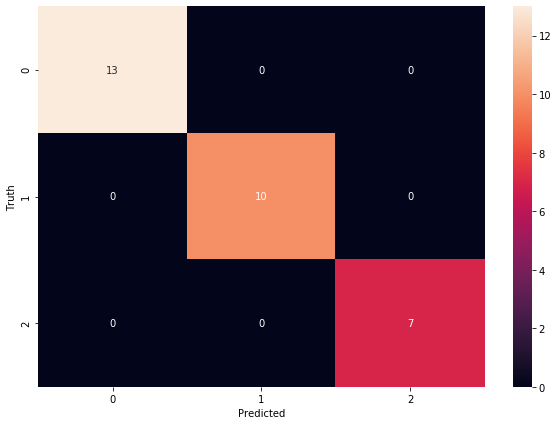

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cn, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')